In [965]:
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [966]:
# 1、load data
df = pd.read_csv('././AirPassengers.csv')
df.columns = ["month","number"]
df['month'] = pd.to_datetime(df['month'])
df.index = df['month']

# 删除列
df.drop(['month'], axis=1, inplace=True)



In [967]:
df.head(500)

,number
month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [968]:
def draw_ts(timeseries):
    f = plt.figure(facecolor='white')
    timeseries.plot(color='blue')
    plt.show()

def draw_trend(timeseries, size):
    f = plt.figure(facecolor='white')
    # 对size个数据进行移动平均
    rol_mean = timeseries.rolling(window=size).mean()
    # 对size个数据移动平均的方差
    rol_std = timeseries.rolling(window=size).std()

    timeseries.plot(color='blue', label='Original')
    rol_mean.plot(color='red', label='Rolling Mean')
    rol_std.plot(color='black', label='Rolling standard deviation')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

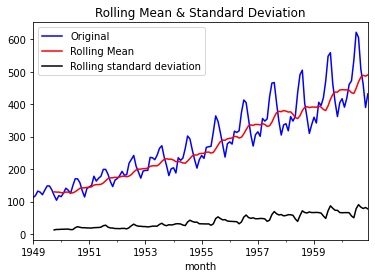

In [969]:
ts = df['number']
draw_trend(ts,10)

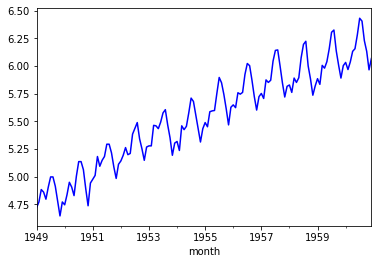

In [970]:
ts_log = np.log(ts)
# ts_log = ts
draw_ts(ts_log)

In [971]:
diff_12 = ts_log.diff(12)
diff_12.dropna(inplace=True)

In [972]:
diff_12_1 = diff_12.diff(1)
# True表示修改数据
diff_12_1.dropna(inplace=True)

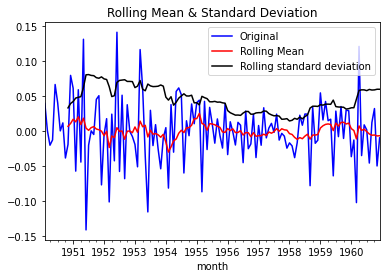

In [973]:
draw_trend(diff_12_1,10)

In [974]:
model1 = sm.tsa.statespace.SARIMAX(ts_log, order=(1, 2, 1),seasonal_order=(0,1,0,12))

d:\11516\usual\anaconda\envs\pred\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
d:\11516\usual\anaconda\envs\pred\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [975]:
result_arima = model1.fit(disp=True)

In [976]:
predict_ts = result_arima.predict()
predict_ts_af = result_arima.predict(start='1958-01-01', end = '1960-12-01', dynamic=True)
predict_ts_forecast = result_arima.forecast(12)

In [977]:
log_recover = np.exp(predict_ts)
log_recover.dropna(inplace=True)

log_recover_af = np.exp(predict_ts_af)
log_recover_af.dropna(inplace=True)


log_recover_forecast = np.exp(predict_ts_forecast)
log_recover_forecast.dropna(inplace=True)


In [978]:
testsize = int(ts.size * 0.5)
log_recover = log_recover[-testsize:]
predict_ts = predict_ts[-testsize:]


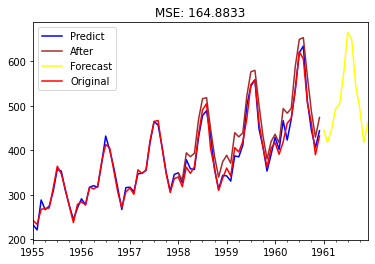

In [979]:
ts = ts[log_recover.index]
log_recover.plot(color='blue', label = 'Predict')
log_recover_af.plot(color='brown', label = 'After')
log_recover_forecast.plot(color='yellow', label='Forecast')
ts.plot(color='red', label='Original')
plt.legend(loc='best')
plt.title('MSE: %.4f'% mean_squared_error(log_recover,ts))

plt.show()